In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import matthews_corrcoef
import numpy as np 
from sklearn import preprocessing
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df_wine = pd.read_csv('C:\VS Code\wine_cleared\wine_cleared.csv')

In [3]:
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Вычислите наименьший балл за вино в датасете.

In [4]:
df_wine['points'].min()

80

Вычислите наименьшую цену за бутылку в наборе данных.

In [5]:
df_wine['price'].min()

4.0

In [6]:
round(statistics.mean(df_wine['price']), 2)

35.36

In [7]:
df_wine['price'].mean()

35.363389129985535

In [8]:
round(statistics.median(df_wine['price']), 2)

28.0

In [9]:
df_wine['price'].median()

28.0

In [10]:
len(df_wine['price'])

129971

In [11]:
statistics.mode(df_wine['price'])

35.363389129985535

In [12]:
df_wine['price'].mode()

0    35.363389
Name: price, dtype: float64

Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой

In [13]:
round(df_wine['price'].corr(df_wine['points']), 6)

0.402137

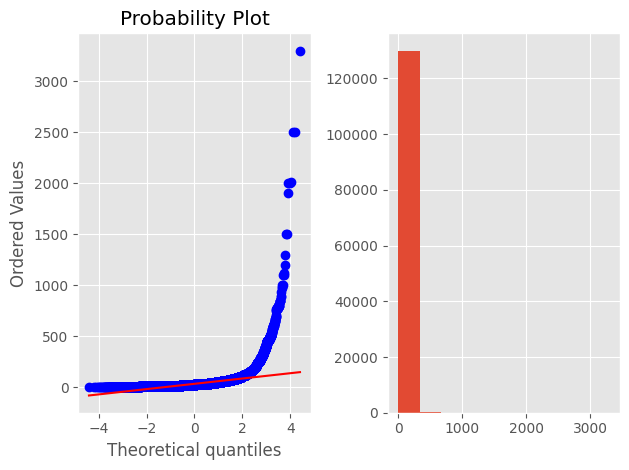

In [14]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df_wine['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df_wine['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Постройте приведённые выше графики для признака points из датасета винных обзоров

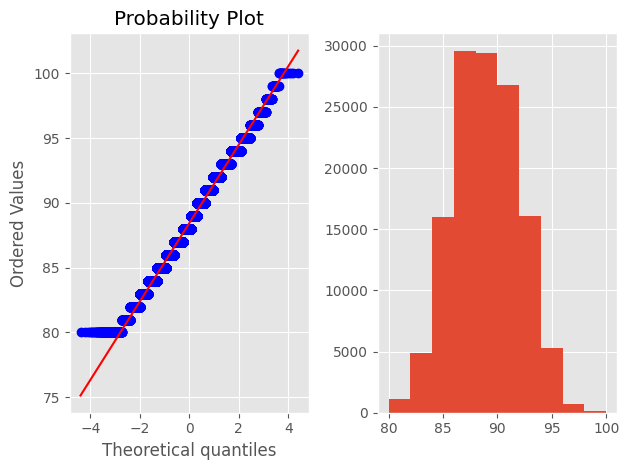

In [15]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df_wine['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df_wine['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Рассчитайте коэффициент корреляции Спирмена для признаков point и price

In [16]:
round(df_wine['points'].corr(df_wine['price'], method='spearman'), 2)

0.58

Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [17]:
round(df_wine['points'].corr(df_wine['price'], method='kendall'), 2)

0.43

In [18]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [19]:
df_wine['price'].describe()

count    129971.000000
mean         35.363389
std          39.577066
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [20]:
col_names = list(df_wine.columns)
col_names

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [21]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df_wine[['price']], y=None)
df_r = pd.DataFrame(df_r, columns=['price'])

In [22]:
df_r.sum()

price    43501.229482
dtype: float64

In [29]:

s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df_wine[['price']], y=None)
df_s = pd.DataFrame(df_s, columns=['price'])
round(df_s['price'][129968], 2)

-0.14